In [101]:
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas import read_csv

from hnc.hnc.constants import *

In [171]:
class npa_information( ):
    def __init__(self, fname, TFW=True, ignore_vxc=True):
        # Load header information
        with open(fname) as f:
            file_info = f.readlines()
    
        self.convergence_info = file_info[1]
        
        self.info_dict = dict(json.loads(file_info[2].strip("#")))
        info_dict = self.info_dict
        
        self.name  = info_dict['name']
        self.μ     = info_dict['μ[AU]']
        self.Z     = info_dict['Z']
        self.A     = info_dict['A']
        self.Zstar = info_dict['Zstar']
        self.Te     = info_dict['Te[AU]']
        self.Ti     = info_dict['Ti[AU]']
        self.rs    = info_dict['rs[AU]']
    
        # Load all data
        data = read_csv(fname, delim_whitespace=True, header=0, comment='#')
        self.data = data
        self.ne   = data['n[AU]']
        self.n_f  = data['nf[AU]']
        self.n_b  = data['nb[AU]']
        self.ni   = data['n_ion[AU]']
        self.φ   = data['φtot[AU]']
        self.vxc = data['δVxc/δρ[Au]']
        self.Uei = data['U_ei[AU]']
        self.Uii = data['U_ii[AU]']
        self.gii = data['g_ii']
        
        self.xs = data['r[AU]']
        self.R  = np.array(self.xs)[-1]
        self.N  = len(self.xs)

        # print(f"{self.name}: {self.convergence_info}")
        match = re.search(r'Err\(IET\)=([0-9.+-eE]+), Q_net', self.convergence_info)
        if match:
            self.iet_convergence = float(match.group(1))

In [172]:
from os import listdir
from os.path import isfile, join
import re
onlyfiles = [f for f in listdir('../data/RPP_Stanek2020') if isfile(join('../data/RPP_Stanek2020', f))]
onlyfiles = np.array(sorted(onlyfiles)).reshape(12,2)

In [174]:
Al1, Al2, Al3, Au1, Au2, Au3, C1, C2, C3, V1, V2, V3  = onlyfiles
npa_information('../data/RPP_Stanek2020/' + V2[0]).info_dict


{'name': 'V2',
 'Z': 23,
 'Zstar': 5.7215190788099894,
 'A': 50.9415,
 'μ[AU]': 0.53866576501,
 'Te[AU]': 0.0735,
 'Ti[AU]': 0.0735,
 'rs[AU]': 2.815}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.374e-10, Err(IET)=9.981e-13, Q_net=-2.415e-08

C1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.987e-10, Err(IET)=9.980e-13, Q_net=0.000e+00

Al1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=7.850e-10, Err(IET)=9.972e-13, Q_net=-6.808e-08

Al1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.963e-10, Err(IET)=9.971e-13, Q_net=0.000e+00

V1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=8.428e-10, Err(IET)=5.634e-06, Q_net=-1.844e-07

V1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.892e-10, Err(IET)=2.832e-04, Q_net=-9.095e-13

Au1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.267e-10, Err(IET)=5.927e-02, Q_net=-7.013e-07

Au1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.972e-10, Err(IET)=6.271e+03, Q_net=0.000e+00

C2: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.465e-10, Err(IET)=9.963e-13, Q_net=-2.443e-08

C2: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.873e-10, Err(IET)=9.963e-13, Q_net=0.000e+00

Al2: # Convergence: Err(φ)=0.000e+00, Err(n_e)=8.0

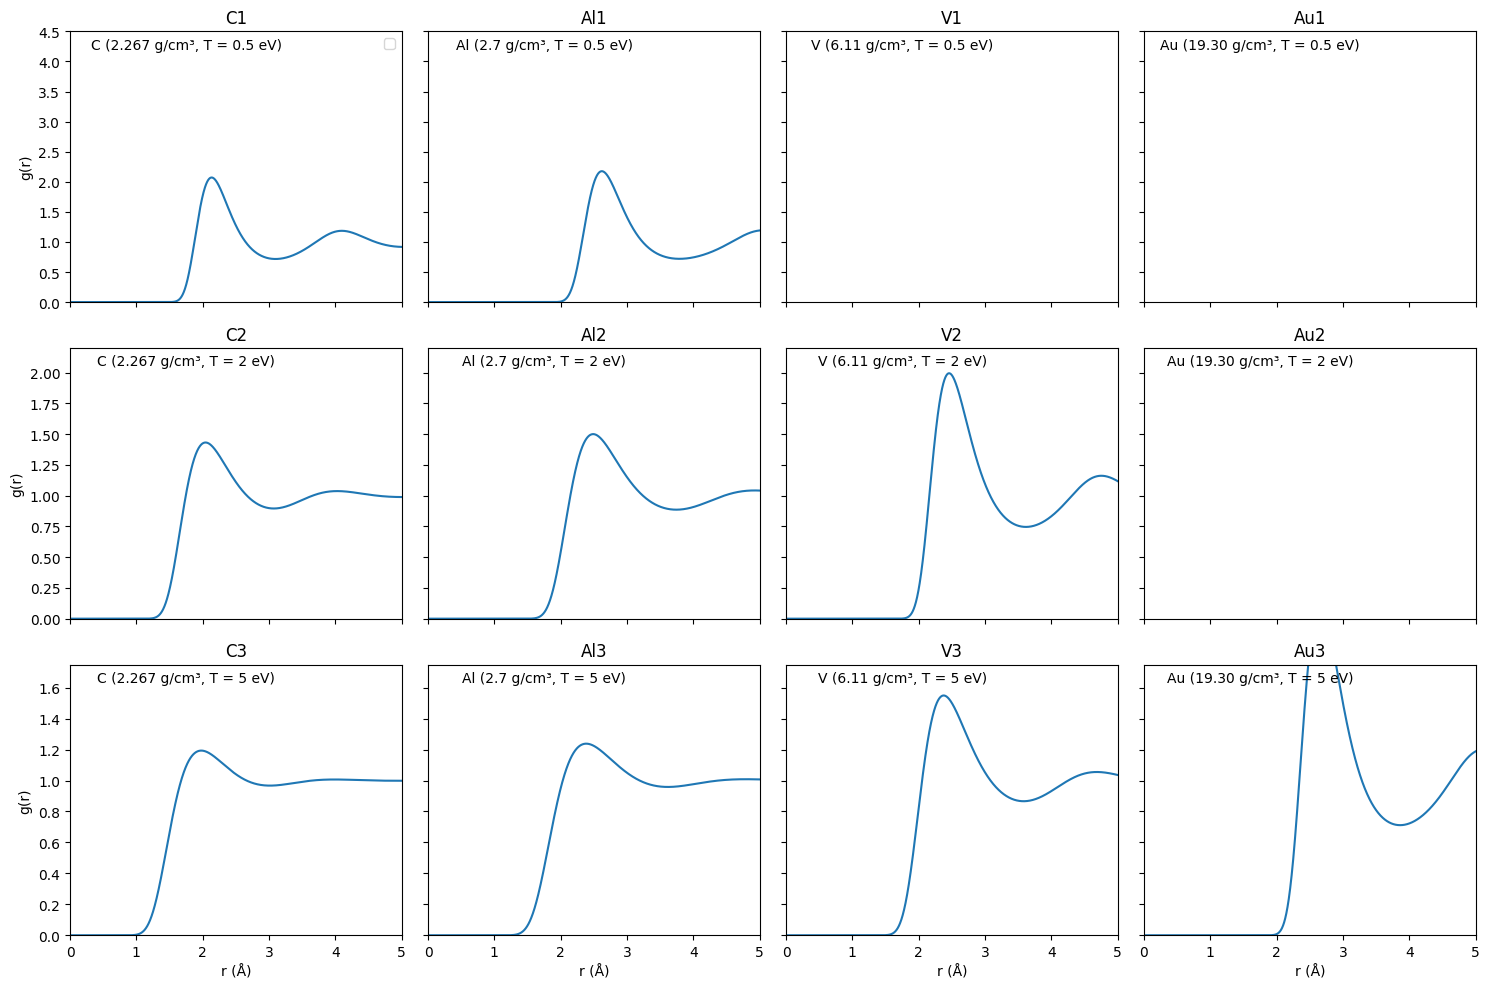

In [147]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Titles and Labels
titles = ['C (2.267 g/cm³, T = 0.5 eV)', 'Al (2.7 g/cm³, T = 0.5 eV)', 'V (6.11 g/cm³, T = 0.5 eV)', 'Au (19.30 g/cm³, T = 0.5 eV)',
          'C (2.267 g/cm³, T = 2 eV)', 'Al (2.7 g/cm³, T = 2 eV)', 'V (6.11 g/cm³, T = 2 eV)', 'Au (19.30 g/cm³, T = 2 eV)',
          'C (2.267 g/cm³, T = 5 eV)', 'Al (2.7 g/cm³, T = 5 eV)', 'V (6.11 g/cm³, T = 5 eV)', 'Au (19.30 g/cm³, T = 5 eV)']

file_indices = [6,0,9,3, 7,1,10,4, 8,2,11,5 ]
# Plot the data
for i, ax in enumerate(axs.flat):
    file = onlyfiles[file_indices[i]]
    aa, npa = npa_information('../data/RPP_Stanek2020/' + file[0]), npa_information('../data/RPP_Stanek2020/' + file[1])
    ax.set_title(f"{aa.name}")
    if npa.iet_convergence<1e-8:
        ax.plot(npa.xs*AU_to_Angstrom, npa.gii )
    ax.text(0.35, 0.95, titles[i], horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10)


    ax.set_xlim(0,5)
    if i<4:
        ax.set_ylim(0,4.5)
    elif i<8:
        ax.set_ylim(0,2.2)
    elif i<12:
        ax.set_ylim(0,1.75)
        
    if i % 4 != 0:
        ax.set_yticklabels([])
        ax.set_ylabel('')
    if i < 8:
        ax.set_xticklabels([])
        ax.set_xlabel('')
    if i == 0:
        ax.legend()

# Adding back the x and y labels for the bottom row and left column
for i in range(8, 12):
    axs.flat[i].set_xlabel('r (Å)')
for i in range(0, 12, 4):
    axs.flat[i].set_ylabel('g(r)')

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.374e-10, Err(IET)=9.981e-13, Q_net=-2.415e-08

C1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.987e-10, Err(IET)=9.980e-13, Q_net=0.000e+00

Al1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=7.850e-10, Err(IET)=9.972e-13, Q_net=-6.808e-08

Al1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.963e-10, Err(IET)=9.971e-13, Q_net=0.000e+00

V1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=8.428e-10, Err(IET)=5.634e-06, Q_net=-1.844e-07

V1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.892e-10, Err(IET)=2.832e-04, Q_net=-9.095e-13

Au1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.267e-10, Err(IET)=5.927e-02, Q_net=-7.013e-07

Au1: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.972e-10, Err(IET)=6.271e+03, Q_net=0.000e+00

C2: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.465e-10, Err(IET)=9.963e-13, Q_net=-2.443e-08

C2: # Convergence: Err(φ)=0.000e+00, Err(n_e)=9.873e-10, Err(IET)=9.963e-13, Q_net=0.000e+00

Al2: # Convergence: Err(φ)=0.000e+00, Err(n_e)=8.0

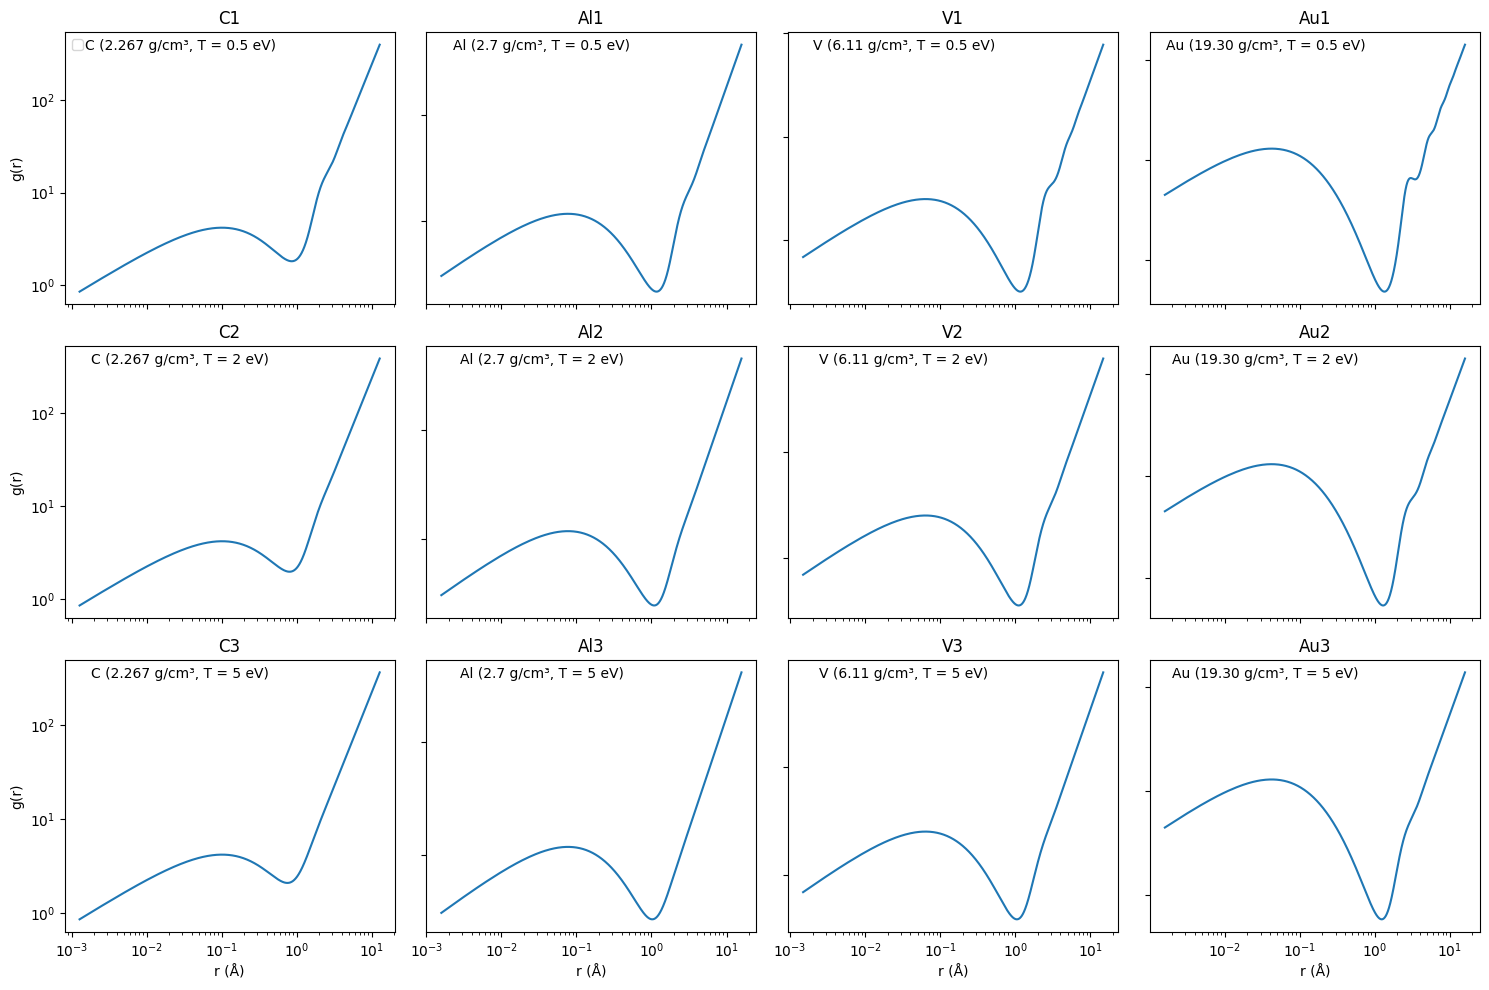

In [155]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Titles and Labels
titles = ['C (2.267 g/cm³, T = 0.5 eV)', 'Al (2.7 g/cm³, T = 0.5 eV)', 'V (6.11 g/cm³, T = 0.5 eV)', 'Au (19.30 g/cm³, T = 0.5 eV)',
          'C (2.267 g/cm³, T = 2 eV)', 'Al (2.7 g/cm³, T = 2 eV)', 'V (6.11 g/cm³, T = 2 eV)', 'Au (19.30 g/cm³, T = 2 eV)',
          'C (2.267 g/cm³, T = 5 eV)', 'Al (2.7 g/cm³, T = 5 eV)', 'V (6.11 g/cm³, T = 5 eV)', 'Au (19.30 g/cm³, T = 5 eV)']

file_indices = [6,0,9,3, 7,1,10,4, 8,2,11,5 ]
# Plot the data
for i, ax in enumerate(axs.flat):
    file = onlyfiles[file_indices[i]]
    aa, npa = npa_information('../data/RPP_Stanek2020/' + file[0]), npa_information('../data/RPP_Stanek2020/' + file[1])
    ax.set_title(f"{aa.name}")
    # if npa.iet_convergence<1e-8:
    ax.plot(npa.xs*AU_to_Angstrom, 4*np.pi*npa.ne*npa.xs**2 )
    ax.text(0.35, 0.95, titles[i], horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10)

    ax.set_yscale('symlog', linthresh=1e-3)
    ax.set_xscale('log')

    if i % 4 != 0:
        ax.set_yticklabels([])
        ax.set_ylabel('')
    if i < 8:
        ax.set_xticklabels([])
        ax.set_xlabel('')
    if i == 0:
        ax.legend()

# Adding back the x and y labels for the bottom row and left column
for i in range(8, 12):
    axs.flat[i].set_xlabel('r (Å)')
for i in range(0, 12, 4):
    axs.flat[i].set_ylabel('g(r)')

plt.tight_layout()
plt.show()
